In [15]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element

In [16]:
@element(num_params=4,units=["","","","",""],overwrite=True)
def arbitRCPE(p,f):
    Q, alpha, a, b = p[0], p[1], p[2], p[3]
    
    def R(x):
        return a/(1+b*x)
    
    def fun(x,y,lmdcos,lmdsin):
        return np.vstack((y[2]*R(x),y[3]*R(x),lmdcos*y[0]-lmdsin*y[1],lmdcos*y[1]+lmdsin*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    x=np.linspace(0,1,1000)
    y=np.zeros((4,x.size))
 
    Z_list=np.zeros((np.size(np.array(f))),dtype=complex)
    ii=0
    for freq in np.array(f):
        w=2*np.pi*freq
        lmdcos=w**alpha*Q*np.cos(alpha*np.pi/2)
        lmdsin=w**alpha*Q*np.sin(alpha*np.pi/2)
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmdcos=lmdcos,lmdsin=lmdsin), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=2/(-(y3[0]+y4[0]*1j))
        Z_list[ii]=Z
        ii=ii+1
    return Z_list


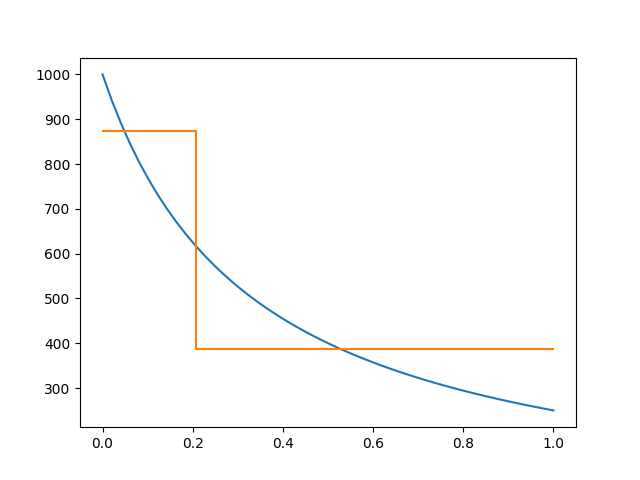

In [23]:
fig1, axx= plt.subplots()
x=np.linspace(0,1)
a=1000
b=3
def R(x):
    return a/(1+b*x)
axx.plot(x,R(x))

axx.plot([0,0.2063,0.2063,1],[873,873,387,387])

6.2099404181017945


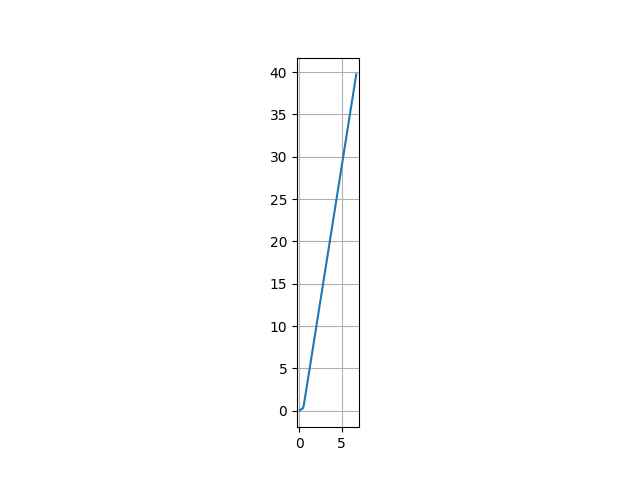

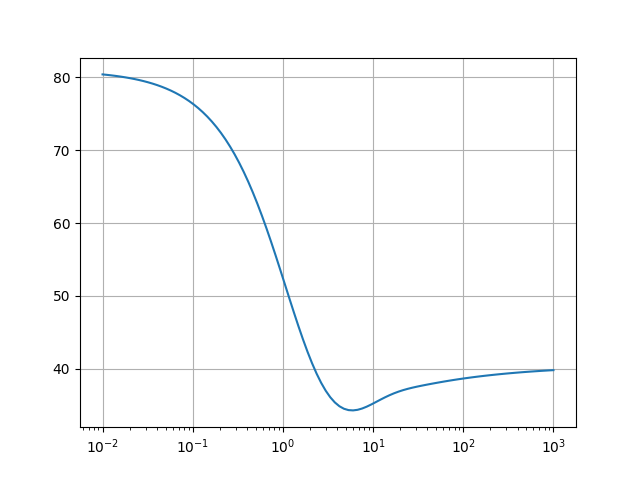

In [22]:
c=CustomCircuit(initial_guess=[6e-4,0.9,1000,3],circuit="arbitRCPE")
z=c.predict(frequencies=np.logspace(-2,3,100))
fig, ax=plt.subplots()
ax.plot(np.real(z)/1000,-np.imag(z)/1000)
ax.set_aspect("equal")
ax.grid(True)

fig2, ax2=plt.subplots()
ax2.plot(np.logspace(-2,3,100),-np.angle(z,deg=True))
ax2.set_xscale("log")
ax2.grid(True)

print(0.9*45-np.min(-np.angle(z,deg=True)))